<a href="https://colab.research.google.com/github/rahulcheeti/machine-learning/blob/master/hw1prog5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# connected components for training and testing
con_comp_train = list()
con_comp_test = list()
for i in range(60000):
  if y_train[i] == 1 or y_train[i] == 2 or y_train[i] == 3 or y_train[i] == 4 or y_train[i] == 5 or y_train[i] == 7:
    con_comp_train.append(1/3)
  if y_train[i] == 0 or y_train[i] == 6 or y_train[i] == 9:
    con_comp_train.append(2/3)
  if y_train[i] == 8:
    con_comp_train.append(1)
    
for i in range(10000):
  if y_test[i] == 1 or y_test[i] == 2 or y_test[i] == 3 or y_test[i] == 4 or y_test[i] == 5 or y_test[i] == 7:
    con_comp_test.append(1/3)
  if y_test[i] == 0 or y_test[i] == 6 or y_test[i] == 9:
    con_comp_test.append(2/3)
  if y_test[i] == 8:
    con_comp_test.append(1)

# width of training and testing images
x_train_row = np.sum(x_train, axis = 1, keepdims = True)
x_test_row = np.sum(x_test, axis = 1 , keepdims = True)
x_train_width = list()
for i in range(60000):
  count = 0
  for j in range(28):
    if x_train_row[i][0][j] > 0:
      count += 1
  x_train_width.append(count/28)
x_test_width = list()
for i in range(10000):
  count = 0
  for j in range(28):
    if x_test_row[i][0][j] > 0:
      count += 1
  x_test_width.append(count/28)

# height of training and testing images
x_train_col = np.sum(x_train, axis = 2, keepdims = True)
x_test_col = np.sum(x_test, axis = 2, keepdims = True)
x_train_height = list()
for i in range(60000):
  count = 0
  for j in range(28):
    if x_train_col[i][j][0] > 0:
      count += 1
  x_train_height.append(count/28)
x_test_height = list()
for i in range(10000):
  count = 0
  for j in range(28):
    if x_test_col[i][j][0] > 0:
      count += 1
  x_test_height.append(count/28)

# preprocessing of x-training and x-testing data
x_train = (x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test = (x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train = x_train.astype('float')
x_test = x_test.astype('float')
x_train /= 255
x_test /= 255

# concatenating x-training and x-testing features
train = np.zeros((60000,787))
test = np.zeros((10000,787))
for i in range(60000):
  for j in range(784):
    train[i][j] = x_train[i][j]
  train[i][784] = con_comp_train[i]
  train[i][785] = x_train_width[i]
  train[i][786] = x_train_height[i]
for i in range(10000):
  for j in range(784):
    test[i][j] = x_test[i][j]
  test[i][784] = con_comp_test[i]
  test[i][785] = x_test_width[i]
  test[i][786] = x_test_height[i]

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 32us/step - loss: 0.7078 - acc: 0.8338 - val_loss: 0.4317 - val_acc: 0.8923
Epoch 2/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.4098 - acc: 0.8939 - val_loss: 0.3574 - val_acc: 0.9077
Epoch 3/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.3578 - acc: 0.9057 - val_loss: 0.3238 - val_acc: 0.9164
Epoch 4/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.3298 - acc: 0.9118 - val_loss: 0.3026 - val_acc: 0.9219
Epoch 5/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.3109 - acc: 0.9168 - val_loss: 0.2890 - val_acc: 0.9249
Epoch 6/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.2968 - acc: 0.9207 - val_loss: 0.2781 - val_acc: 0.9273
Epoch 7/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.2856 - acc: 0.9236 - val_loss: 0.2681 - val_acc

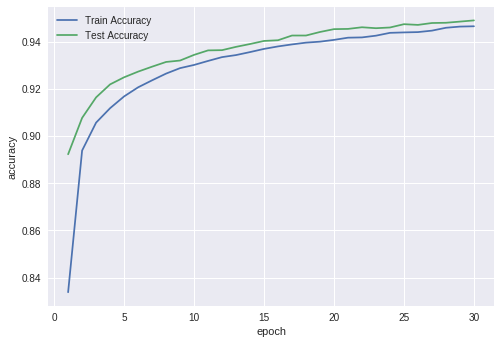

In [8]:
# Model
model = Sequential()

model.add(Dense(units = 10, activation = 'softmax'))

lear_rate = 0.05

sgd = keras.optimizers.SGD(lr=lear_rate)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

History = model.fit(train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test, y_test))
score = model.evaluate(test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,31),History.history['acc'],range(1,31),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)
